In [1]:
%matplotlib inline

# Comparisons between different versions of skprocrustes solvers

In [2]:
import skprocrustes as skp
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1. Comparison between old versions of all solvers

In [3]:
gkbsolver = skp.GKBSolver(verbose=0)
spgsolver = skp.SPGSolver(verbose=0)
gpisolver = skp.GPISolver(verbose=0)
ebsolver = skp.EBSolver(verbose=0)

## Problem 1

In [4]:
problem1 = skp.ProcrustesProblem((5000,5000,10,10), problemnumber=1)

### Problem 1: GKB

In [5]:
t0 = time.time(); results1_gkb = gkbsolver.solve(problem1); t1_gkb = time.time()-t0; print(t1_gkb)

1.4648008346557617


In [6]:
results1_gkb.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 1.356796838548058e-06
normgrad : 1.8137752238665688e-05
nbiter : 0.09
nfev : 0.10800000000000001
blocksteps : 3


### Problem 1: SPG

In [7]:
t0 = time.time(); results1_spg = spgsolver.solve(problem1); t1_spg = time.time()-t0; print(t1_spg)

2.6056413650512695


In [8]:
results1_spg.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 3.650803449675828e-11
normgrad : 0.0002814298063655452
nbiter : 6
nfev : 7.0


### Problem 1: GPI

In [9]:
t0 = time.time(); results1_gpi = gpisolver.solve(problem1); t1_gpi = time.time()-t0; print(t1_gpi)

23.890547275543213


In [10]:
results1_gpi.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 2.402815405055444e-07
nbiter : 5
nfev : 6


### Problem 1: EB

In [11]:
t0 = time.time(); results1_eb = ebsolver.solve(problem1); t1_eb = time.time()-t0; print(t1_eb)

720.4642467498779


In [12]:
results1_eb.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 5.536188817884922e-07
nbiter : 8
nfev : 9


### Problem 1: All

Text(0.5,1,'Problem 1')

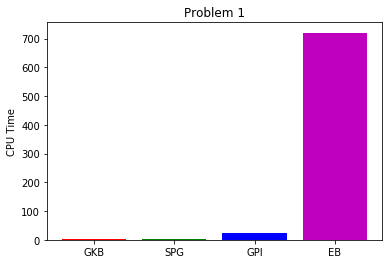

In [13]:
gkb, spg, gpi, eb = plt.bar([0,1,2,3], [t1_gkb, t1_spg, t1_gpi, t1_eb])
gkb.set_facecolor('r')
spg.set_facecolor('g')
gpi.set_facecolor('b')
eb.set_facecolor('m')
ax = plt.gca()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['GKB', 'SPG', 'GPI', 'EB'])
#ax.set_ylim([0, 100])
ax.set_ylabel('CPU Time')
ax.set_title('Problem 1')

In [14]:
results = pd.DataFrame({ 'GKB' : [t1_gkb], 'SPG' : [t1_spg], 'GPI' : [t1_gpi], 'EB' : [t1_eb]}, index=['problem1'])
results = results.T
results

,problem1
GKB,1.464801
SPG,2.605641
GPI,23.890547
EB,720.464247


## Problem 2

In [15]:
problem2 = skp.ProcrustesProblem((500,500,5,5), problemnumber=2)

### Problem 2: GKB

In [16]:
t0 = time.time(); results2_gkb = gkbsolver.solve(problem2); t2_gkb = time.time()-t0; print(t2_gkb)

141.4156413078308


In [17]:
results2_gkb.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 1.0331400013001382e-07
normgrad : 0.0003805496868961612
nbiter : 32471.200000000008
nfev : 55044.400000005306
blocksteps : 97


### Problem 2: SPG

In [18]:
t0 = time.time(); results2_spg = spgsolver.solve(problem2); t2_spg = time.time()-t0; print(t2_spg)

0.6697518825531006


In [19]:
results2_spg.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 1.971594271897369e-08
normgrad : 0.000968998869953896
nbiter : 520
nfev : 876.0


### Problem 2: GPI

In [20]:
t0 = time.time(); results2_gpi = gpisolver.solve(problem2); t2_gpi = time.time()-t0; print(t2_gpi)

2.761721611022949


In [21]:
results2_gpi.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 0.0005648845110181697
nbiter : 1241
nfev : 1242


### Problem 2: EB

In [22]:
t0 = time.time(); results2_eb = ebsolver.solve(problem2); t2_eb = time.time()-t0; print(t2_eb)

182.22071957588196


In [23]:
results2_eb.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 9.978668157791289e-07
nbiter : 2739
nfev : 2740


### Problem 2: All

Text(0.5,1,'Problem 2')

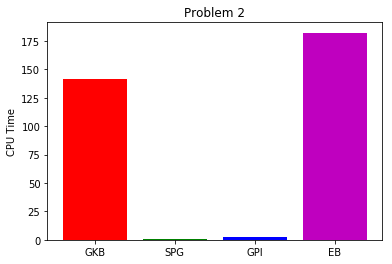

In [24]:
gkb, spg, gpi, eb = plt.bar([0,1,2,3], [t2_gkb, t2_spg, t2_gpi, t2_eb])
gkb.set_facecolor('r')
spg.set_facecolor('g')
gpi.set_facecolor('b')
eb.set_facecolor('m')
ax = plt.gca()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['GKB', 'SPG', 'GPI', 'EB'])
#ax.set_ylim([0, 100])
ax.set_ylabel('CPU Time')
ax.set_title('Problem 2')

In [25]:
results['problem2'] = pd.Series([t2_gkb, t2_spg, t2_gpi, t2_eb], index=results.index)
results

,problem1,problem2
GKB,1.464801,141.415641
SPG,2.605641,0.669752
GPI,23.890547,2.761722
EB,720.464247,182.220720


## Problem 3

In [34]:
problem3 = skp.ProcrustesProblem((1000, 1000, 5, 5), problemnumber=3)

### Problem 3: GKB

In [35]:
t0 = time.time(); results3_gkb = gkbsolver.solve(problem3); t3_gkb = time.time()-t0; print(t3_gkb)

98.37644624710083


In [36]:
results3_gkb.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 2.2042145673987446e-06
normgrad : 0.000948891935006996
nbiter : 4711.175000000001
nfev : 6383.2599999999165
blocksteps : 200


### Problem 3: SPG

In [37]:
t0 = time.time(); results3_spg = spgsolver.solve(problem3); t3_spg = time.time()-t0; print(t3_spg)

0.1624917984008789


In [38]:
results3_spg.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 4.243405518052438e-05
normgrad : 0.0007263441639077083
nbiter : 31
nfev : 38.0


### Problem 3: GPI

In [39]:
t0 = time.time(); results3_gpi = gpisolver.solve(problem3); t3_gpi = time.time()-t0; print(t3_gpi)

0.788931131362915


In [40]:
results3_gpi.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 5.401435589027177e-05
nbiter : 74
nfev : 75


### Problem 3: EB

In [41]:
t0 = time.time(); results3_eb = ebsolver.solve(problem3); t3_eb = time.time()-t0; print(t3_eb)

99.98649406433105


In [42]:
results3_eb.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 4.242901381421668e-05
nbiter : 166
nfev : 167


### Problem 3: All

Text(0.5,1,'Problem 3')

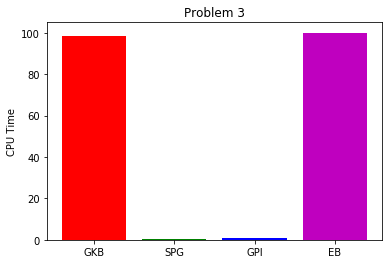

In [43]:
gkb, spg, gpi, eb = plt.bar([0,1,2,3], [t3_gkb, t3_spg, t3_gpi, t3_eb])
gkb.set_facecolor('r')
spg.set_facecolor('g')
gpi.set_facecolor('b')
eb.set_facecolor('m')
ax = plt.gca()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['GKB', 'SPG', 'GPI', 'EB'])
#ax.set_ylim([0, 100])
ax.set_ylabel('CPU Time')
ax.set_title('Problem 3')

In [44]:
results['problem3'] = pd.Series([t3_gkb, t3_spg, t3_gpi, t3_eb], index=results.index)
results

,problem1,problem2,problem3
GKB,1.464801,141.415641,98.376446
SPG,2.605641,0.669752,0.162492
GPI,23.890547,2.761722,0.788931
EB,720.464247,182.220720,99.986494


## 2. Comparison between blobop and old residual for GKBSolver.

In [45]:
gkbsolver_blobop = skp.GKBSolver(verbose=0, bloboptest = True)

### Problem 1

In [46]:
t0 = time.time(); results1_gkbblobop = gkbsolver_blobop.solve(problem1); t1_blobop = time.time()-t0

In [47]:
results1_gkbblobop.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 1.362771769311597e-06
normgrad : 4.198305440171956e-05
nbiter : 0.07200000000000001
nfev : 0.09000000000000002
blocksteps : 3


In [48]:
results1_gkb.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 1.356796838548058e-06
normgrad : 1.8137752238665688e-05
nbiter : 0.09
nfev : 0.10800000000000001
blocksteps : 3


Text(0.5,1,'Problem 1')

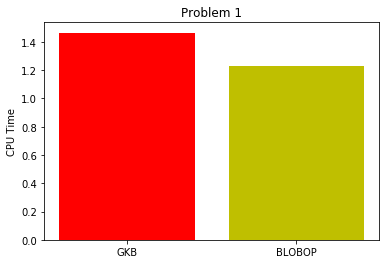

In [49]:
gkb, blobop = plt.bar([0,1], [t1_gkb, t1_blobop])
gkb.set_facecolor('r')
blobop.set_facecolor('y')
ax = plt.gca()
ax.set_xticks([0,1])
ax.set_xticklabels(['GKB', 'BLOBOP'])
#ax.set_ylim([0, 100])
ax.set_ylabel('CPU Time')
ax.set_title('Problem 1')

Text(0.5,1,'Problem 1')

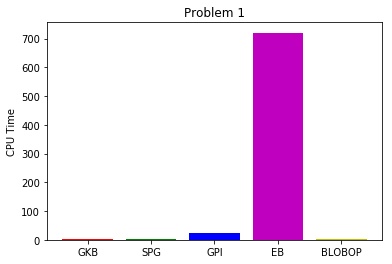

In [50]:
gkb, spg, gpi, eb, blobop = plt.bar([0,1,2,3,4], [t1_gkb, t1_spg, t1_gpi, t1_eb, t1_blobop])
gkb.set_facecolor('r')
spg.set_facecolor('g')
gpi.set_facecolor('b')
eb.set_facecolor('m')
blobop.set_facecolor('y')
ax = plt.gca()
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['GKB', 'SPG', 'GPI', 'EB', 'BLOBOP'])
#ax.set_ylim([0, 100])
ax.set_ylabel('CPU Time')
ax.set_title('Problem 1')

### Problem 2

In [51]:
t0 = time.time(); results2_gkbblobop = gkbsolver_blobop.solve(problem2); t2_blobop = time.time()-t0

In [52]:
results2_gkbblobop.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 2.877625244684322e-08
normgrad : 0.0004151077654649252
nbiter : 1633.18
nfev : 2877.0300000000007
blocksteps : 100


In [53]:
results2_gkb.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 1.0331400013001382e-07
normgrad : 0.0003805496868961612
nbiter : 32471.200000000008
nfev : 55044.400000005306
blocksteps : 97


Text(0.5,1,'Problem 2')

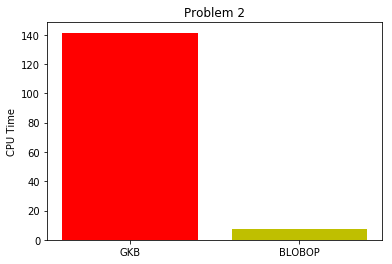

In [54]:
gkb, blobop = plt.bar([0,1], [t2_gkb, t2_blobop])
gkb.set_facecolor('r')
blobop.set_facecolor('y')
ax = plt.gca()
ax.set_xticks([0,1])
ax.set_xticklabels(['GKB', 'BLOBOP'])
#ax.set_ylim([0, 100])
ax.set_ylabel('CPU Time')
ax.set_title('Problem 2')

Text(0.5,1,'Problem 2')

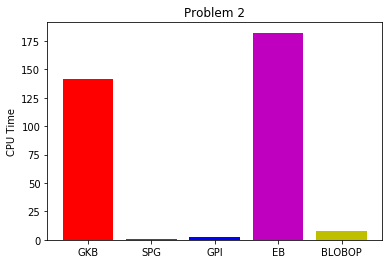

In [55]:
gkb, spg, gpi, eb, blobop = plt.bar([0,1,2,3,4], [t2_gkb, t2_spg, t2_gpi, t2_eb, t2_blobop])
gkb.set_facecolor('r')
spg.set_facecolor('g')
gpi.set_facecolor('b')
eb.set_facecolor('m')
blobop.set_facecolor('y')
ax = plt.gca()
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['GKB', 'SPG', 'GPI', 'EB', 'BLOBOP'])
#ax.set_ylim([0, 100])
ax.set_ylabel('CPU Time')
ax.set_title('Problem 2')

### Problem 3

In [56]:
t0 = time.time(); results3_gkbblobop = gkbsolver_blobop.solve(problem3); t3_blobop = time.time()-t0

In [57]:
results3_gkbblobop.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 1.3388545979624172e-06
normgrad : 0.0008379390464818944
nbiter : 1400.8650000000002
nfev : 1840.3849999999954
blocksteps : 200


In [58]:
results3_gkb.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 2.2042145673987446e-06
normgrad : 0.000948891935006996
nbiter : 4711.175000000001
nfev : 6383.2599999999165
blocksteps : 200


Text(0.5,1,'Problem 3')

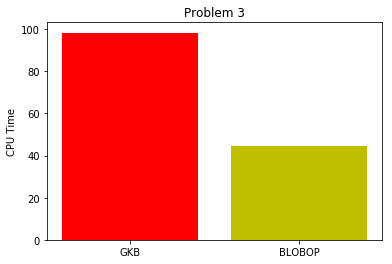

In [59]:
gkb, blobop = plt.bar([0,1], [t3_gkb, t3_blobop])
gkb.set_facecolor('r')
blobop.set_facecolor('y')
ax = plt.gca()
ax.set_xticks([0,1])
ax.set_xticklabels(['GKB', 'BLOBOP'])
#ax.set_ylim([0, 100])
ax.set_ylabel('CPU Time')
ax.set_title('Problem 3')

Text(0.5,1,'Problem 3')

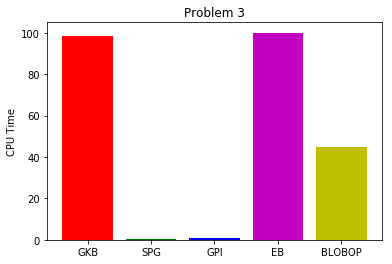

In [60]:
gkb, spg, gpi, eb, blobop = plt.bar([0,1,2,3,4], [t3_gkb, t3_spg, t3_gpi, t3_eb, t3_blobop])
gkb.set_facecolor('r')
spg.set_facecolor('g')
gpi.set_facecolor('b')
eb.set_facecolor('m')
blobop.set_facecolor('y')
ax = plt.gca()
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['GKB', 'SPG', 'GPI', 'EB', 'BLOBOP'])
#ax.set_ylim([0, 100])
ax.set_ylabel('CPU Time')
ax.set_title('Problem 3')

In [61]:
r = pd.DataFrame({'problem1' : t1_blobop, 'problem2' : t2_blobop, 'problem3' : t3_blobop}, index=['BLOBOP'])
results = results.append(r)
results

,problem1,problem2,problem3
GKB,1.464801,141.415641,98.376446
SPG,2.605641,0.669752,0.162492
GPI,23.890547,2.761722,0.788931
EB,720.464247,182.220720,99.986494
BLOBOP,1.228617,7.477077,44.583440


## 3. Comparison between svd and polar decomposition on GKBSolver

In [62]:
gkbpolar = skp.GKBSolver(verbose=0, polar="ns")
gkbpolarblobop = skp.GKBSolver(verbose=0, polar="ns", bloboptest=True)

### Problem 1

In [63]:
t0 = time.time(); results1_gkbpolar = gkbpolar.solve(problem1); t1_gkbpolar = time.time()-t0

In [64]:
results1_gkbpolar.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 1.356966497640276e-06
normgrad : 1.8140182342238757e-05
nbiter : 0.09
nfev : 0.10800000000000001
blocksteps : 3


In [65]:
t0 = time.time(); results1_gkbpolarblobop = gkbpolarblobop.solve(problem1); t1_gkbpolarblobop = time.time()-t0

In [66]:
results1_gkbpolarblobop.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 1.36597474327368e-06
normgrad : 4.201749566593682e-05
nbiter : 0.07200000000000001
nfev : 0.09000000000000002
blocksteps : 3


Text(0.5,1,'Problem 1')

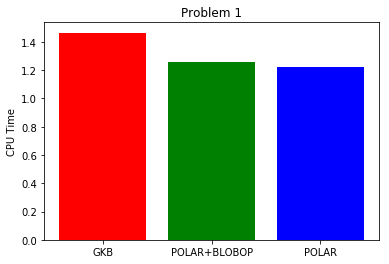

In [67]:
gkb, polarblobop, polar = plt.bar([0,1,2], [t1_gkb, t1_gkbpolarblobop, t1_gkbpolar])
gkb.set_facecolor('r')
polarblobop.set_facecolor('g')
polar.set_facecolor('b')
ax = plt.gca()
ax.set_xticks([0,1,2])
ax.set_xticklabels(['GKB', 'POLAR+BLOBOP', 'POLAR'])
#ax.set_ylim([0, 100])
ax.set_ylabel('CPU Time')
ax.set_title('Problem 1')

### Problem 2

In [69]:
t0 = time.time(); results2_gkbpolar = gkbpolar.solve(problem2); t2_gkbpolar = time.time()-t0

In [70]:
results2_gkbpolar.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 1.7028781386131266e-07
normgrad : 0.0008778077880254848
nbiter : 26778.710000000003
nfev : 45200.560000008125
blocksteps : 93


In [71]:
t0 = time.time(); results2_gkbpolarblobop = gkbpolarblobop.solve(problem2); t2_gkbpolarblobop = time.time()-t0

In [72]:
results2_gkbpolarblobop.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 1.529732495734995e-08
normgrad : 0.0002809142654184651
nbiter : 1347.37
nfev : 2354.4400000000005
blocksteps : 100


Text(0.5,1,'Problem 2')

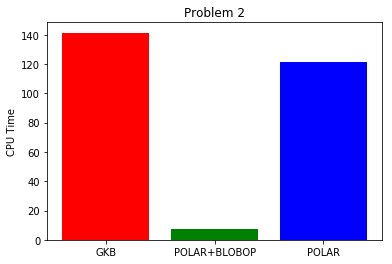

In [73]:
gkb, polarblobop, polar = plt.bar([0,1,2], [t2_gkb, t2_gkbpolarblobop, t2_gkbpolar])
gkb.set_facecolor('r')
polarblobop.set_facecolor('g')
polar.set_facecolor('b')
ax = plt.gca()
ax.set_xticks([0,1,2])
ax.set_xticklabels(['GKB', 'POLAR+BLOBOP', 'POLAR'])
#ax.set_ylim([0, 100])
ax.set_ylabel('CPU Time')
ax.set_title('Problem 2')

### Problem 3

In [75]:
t0 = time.time(); results3_gkbpolar = gkbpolar.solve(problem3); t3_gkbpolar = time.time()-t0

In [76]:
results3_gkbpolar.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 2.5088717984998106e-06
normgrad : 0.0009965032569177797
nbiter : 5037.8899999999985
nfev : 7084.519999999943
blocksteps : 200


In [77]:
t0 = time.time(); results3_gkbpolarblobop = gkbpolarblobop.solve(problem3); t3_gkbpolarblobop = time.time()-t0

In [78]:
results3_gkbpolarblobop.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 3.9186066753096486e-05
normgrad : 0.0009593176867913745
nbiter : 1327.83
nfev : 1585.2550000000024
blocksteps : 200


Text(0.5,1,'Problem 3')

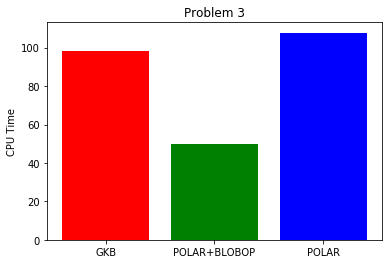

In [79]:
gkb, polarblobop, polar = plt.bar([0,1,2], [t3_gkb, t3_gkbpolarblobop, t3_gkbpolar])
gkb.set_facecolor('r')
polarblobop.set_facecolor('g')
polar.set_facecolor('b')
ax = plt.gca()
ax.set_xticks([0,1,2])
ax.set_xticklabels(['GKB', 'POLAR+BLOBOP', 'POLAR'])
#ax.set_ylim([0, 100])
ax.set_ylabel('CPU Time')
ax.set_title('Problem 3')

In [82]:
r = pd.DataFrame({'problem1' : t1_gkbpolar, 'problem2' : t2_gkbpolar, 'problem3' : t3_gkbpolar}, index=['POLAR'])
results = results.append(r)
r = pd.DataFrame({'problem1' : t1_gkbpolarblobop, 'problem2' : t2_gkbpolarblobop, 'problem3' : t3_gkbpolarblobop}, index=['POLAR+BLOBOP'])
results = results.append(r)
results

,problem1,problem2,problem3
GKB,1.464801,141.415641,98.376446
SPG,2.605641,0.669752,0.162492
GPI,23.890547,2.761722,0.788931
EB,720.464247,182.220720,99.986494
BLOBOP,1.228617,7.477077,44.583440
GKB+POLAR,1.220175,121.742762,107.766008
POLAR+BLOBOP,1.254919,7.202415,49.948579


## 4. Comparison between all versions

### Problem 1

Text(0.5,1,'Problem 1')

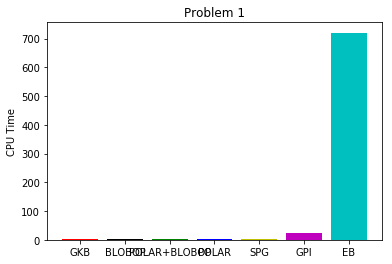

In [83]:
gkb, blobop, polarblobop, polar, spg, gpi, eb = plt.bar([0, 1, 2, 3, 4, 5, 6], [t1_gkb, t1_blobop, t1_gkbpolarblobop, t1_gkbpolar, t1_spg, t1_gpi, t1_eb])
gkb.set_facecolor('r')
blobop.set_facecolor('k')
polarblobop.set_facecolor('g')
polar.set_facecolor('b')
spg.set_facecolor('y')
gpi.set_facecolor('m')
eb.set_facecolor('c')
ax = plt.gca()
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(['GKB', 'BLOBOP', 'POLAR+BLOBOP', 'POLAR', 'SPG', 'GPI', 'EB'])
#ax.set_ylim([0, 100])
ax.set_ylabel('CPU Time')
ax.set_title('Problem 1')

### Problem 2

Text(0.5,1,'Problem 2')

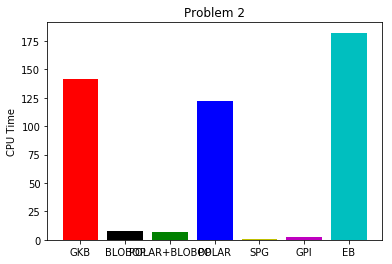

In [84]:
gkb, blobop, polarblobop, polar, spg, gpi, eb = plt.bar([0, 1, 2, 3, 4, 5, 6], [t2_gkb, t2_blobop, t2_gkbpolarblobop, t2_gkbpolar, t2_spg, t2_gpi, t2_eb])
gkb.set_facecolor('r')
blobop.set_facecolor('k')
polarblobop.set_facecolor('g')
polar.set_facecolor('b')
spg.set_facecolor('y')
gpi.set_facecolor('m')
eb.set_facecolor('c')
ax = plt.gca()
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(['GKB', 'BLOBOP', 'POLAR+BLOBOP', 'POLAR', 'SPG', 'GPI', 'EB'])
#ax.set_ylim([0, 100])
ax.set_ylabel('CPU Time')
ax.set_title('Problem 2')

### Problem 3

Text(0.5,1,'Problem 3')

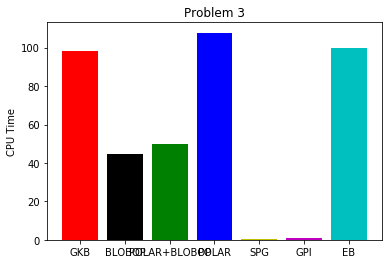

In [85]:
gkb, blobop, polarblobop, polar, spg, gpi, eb = plt.bar([0, 1, 2, 3, 4, 5, 6], [t3_gkb, t3_blobop, t3_gkbpolarblobop, t3_gkbpolar, t3_spg, t3_gpi, t3_eb])
gkb.set_facecolor('r')
blobop.set_facecolor('k')
polarblobop.set_facecolor('g')
polar.set_facecolor('b')
spg.set_facecolor('y')
gpi.set_facecolor('m')
eb.set_facecolor('c')
ax = plt.gca()
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(['GKB', 'BLOBOP', 'POLAR+BLOBOP', 'POLAR', 'SPG', 'GPI', 'EB'])
#ax.set_ylim([0, 100])
ax.set_ylabel('CPU Time')
ax.set_title('Problem 3')